<a href="https://colab.research.google.com/github/seelca/non-trivial-floorplans/blob/main/from_planar_to_dual_graph_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

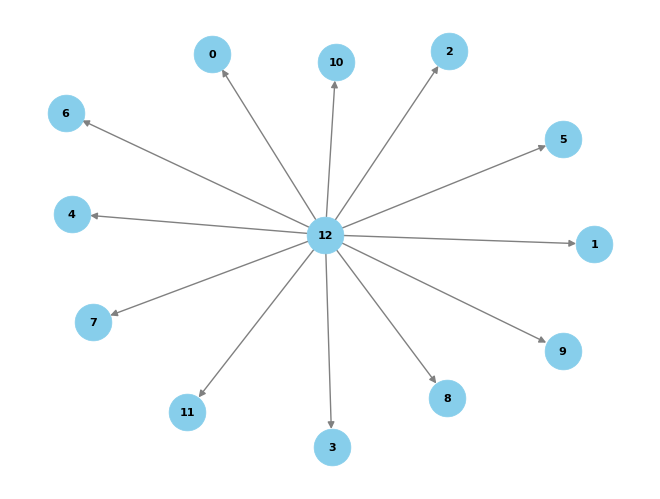

In [7]:
#check planar graph and draw it
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = '/content/drive/MyDrive/Self-organising L-shaped plans/dualgraph.csv'
df = pd.read_csv(file_path)

# Create a directed graph
G = nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=nx.DiGraph())

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, edge_color='gray', linewidths=0.5, arrows=True)

# Show the plot
plt.show()

In [8]:
# Print the graph edges
print("The graph edges are:")
for edge in G.edges():
    print(edge)

The graph edges are:
(12, 7)
(12, 6)
(12, 8)
(12, 9)
(12, 10)
(12, 11)
(12, 0)
(12, 1)
(12, 2)
(12, 3)
(12, 4)
(12, 5)


In [9]:
print(G)

DiGraph with 13 nodes and 12 edges


In [10]:
def planar_to_dual(original_graph):
    dual_graph = {}

    # Step 1: Identify Faces
    faces = list(original_graph.keys())
    print(faces)

    # Step 2: Create a Vertex for Each Face
    for face in faces:
        dual_graph[face] = set()

    # Step 3: Connect Vertices in the Dual Graph
    for face1 in faces:
        for face2 in faces:
            if face1 != face2:
                shared_edge = set(original_graph[face1]) & set(original_graph[face2])
                if shared_edge:
                    dual_graph[face1].add(face2)
                    dual_graph[face2].add(face1)

    return dual_graph

# Example usage:
original_graph = nx.to_dict_of_lists(G)

dual_graph = planar_to_dual(original_graph)

# Print the dual graph
for vertex, neighbors in dual_graph.items():
    print(f"{vertex}: {neighbors}")


[12, 7, 6, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5]
12: set()
7: set()
6: set()
8: set()
9: set()
10: set()
11: set()
0: set()
1: set()
2: set()
3: set()
4: set()
5: set()


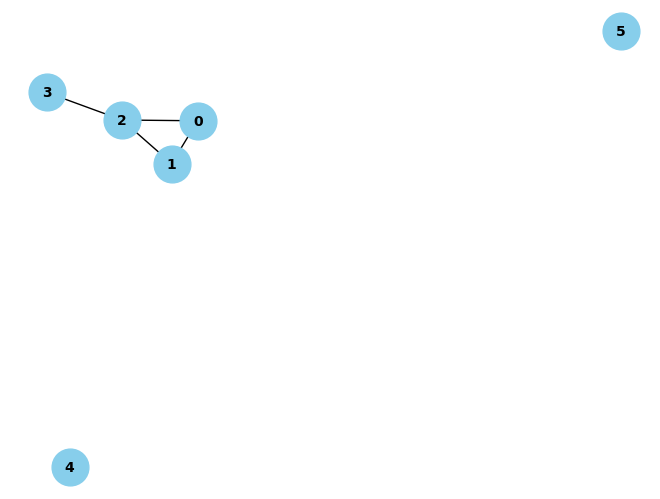

In [11]:
#draw the dual graph

import networkx as nx
import matplotlib.pyplot as plt

# Given data representing the dual graph
dual_graph_data = {
    2: {0, 1, 3},
    4: set(),
    1: {0, 2},
    0: {1, 2},
    5: set(),
    3: {2}
}

# Create a NetworkX graph from the dual graph data
G_dual = nx.Graph()

# Add nodes and edges based on the dual graph data
for vertex, neighbors in dual_graph_data.items():
    G_dual.add_node(vertex)
    G_dual.add_edges_from((vertex, neighbor) for neighbor in neighbors)

# Draw the dual graph
pos = nx.spring_layout(G_dual)  # You can choose a layout algorithm based on your preference
nx.draw(G_dual, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10)

# Display the graph
plt.show()
